# Homework 3 No Current
#### Laura Chamberlain, Erik Chu, McCall James, Jui-Chuan Ma, Xinyang Yang

In [1]:
%pylab inline
import os
from ipypublish import nb_setup
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


# Load and Clean Data

In [2]:
df = pd.read_csv("loan.csv")

/Users/xyang/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = df[df.loan_status!='Current']

In [4]:
df.loan_status.value_counts()

Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

0 - Charged Off, Default, Does not...:Charged Off, Late (31-120 days) <br>
1 - Fully Paid, Does not...:Fully Paid, Current

In [5]:
df["Status"] = df.loan_status.apply(lambda x: 0 if ((x == "Charged Off" )|(x == "Default")|\
                                                    (x == "Does not meet the credit policy. Status:Charged Off")|\
                                                    (x == "Late (31-120 days)")) else 1)

In [6]:
lst = ["Charged Off", "Current", "Default", "Does not meet the credit policy. Status:Charged Off",\
      "Does not meet the credit policy. Status:Fully Paid", "Fully Paid", "Late(31-120 days)"]

df = df[df.loan_status.isin(lst)]

In [7]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

### Drop Columns with over 50% NA

In [8]:
df.mths_since_last_delinq.describe()

count    114294.000000
mean         35.059259
std          21.861345
min           0.000000
25%          17.000000
50%          32.000000
75%          51.000000
max         152.000000
Name: mths_since_last_delinq, dtype: float64

In [9]:
df.isna().sum()[df.isna().sum() > len(df)/2]/len(df)

desc                           0.646344
mths_since_last_delinq         0.555171
mths_since_last_record         0.872834
next_pymnt_d                   0.984557
mths_since_last_major_derog    0.813668
annual_inc_joint               0.999996
dti_joint                      0.999996
verification_status_joint      0.999996
open_acc_6m                    0.999440
open_il_6m                     0.999440
open_il_12m                    0.999440
open_il_24m                    0.999440
mths_since_rcnt_il             0.999455
total_bal_il                   0.999440
il_util                        0.999510
open_rv_12m                    0.999440
open_rv_24m                    0.999440
max_bal_bc                     0.999440
all_util                       0.999440
inq_fi                         0.999440
total_cu_tl                    0.999440
inq_last_12m                   0.999440
dtype: float64

In [10]:
df2 = df.drop(columns=(df.isna().sum()[df.isna().sum() > len(df)/2]/len(df)).index)

In [11]:
df2.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     14169
emp_length                    10002
home_ownership                    0
annual_inc                        4
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
purpose                           0
title                            15
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                    

### Select Related Numberic Columns

In [12]:
df3 = df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv','term', 'int_rate', 'installment', 'grade', 'sub_grade',\
       'home_ownership', 'annual_inc', 'verification_status',\
       'dti', 'delinq_2yrs','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',\
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',\
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',\
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',\
       'last_pymnt_amnt', 'collections_12_mths_ex_med',  'application_type',\
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',\
       'Status']].copy()

In [13]:
df3['cr_history'] = (df.issue_d.astype(np.datetime64)-df.earliest_cr_line.astype(np.datetime64)).astype(int)\
                    /864000e+8

In [14]:
df3.term = df3.term.map({' 36 months':36,' 60 months':60})

In [15]:
df3.grade = df3.grade.map({'B':2, 'C':3, 'A':1, 'E':5, 'F':6, 'D':4, 'G':7})

In [16]:
df3.initial_list_status = (df3.initial_list_status=='f')+0

In [17]:
df2.application_type.value_counts()/len(df2)

INDIVIDUAL    0.999996
JOINT         0.000004
Name: application_type, dtype: float64

In [18]:
# recoveries have high corelated to loan_status
df3.drop(columns=['application_type', 'sub_grade','recoveries','collection_recovery_fee'],inplace=True)

In [19]:
df3 = pd.get_dummies(df3, columns=['verification_status','home_ownership'],dtype=int)

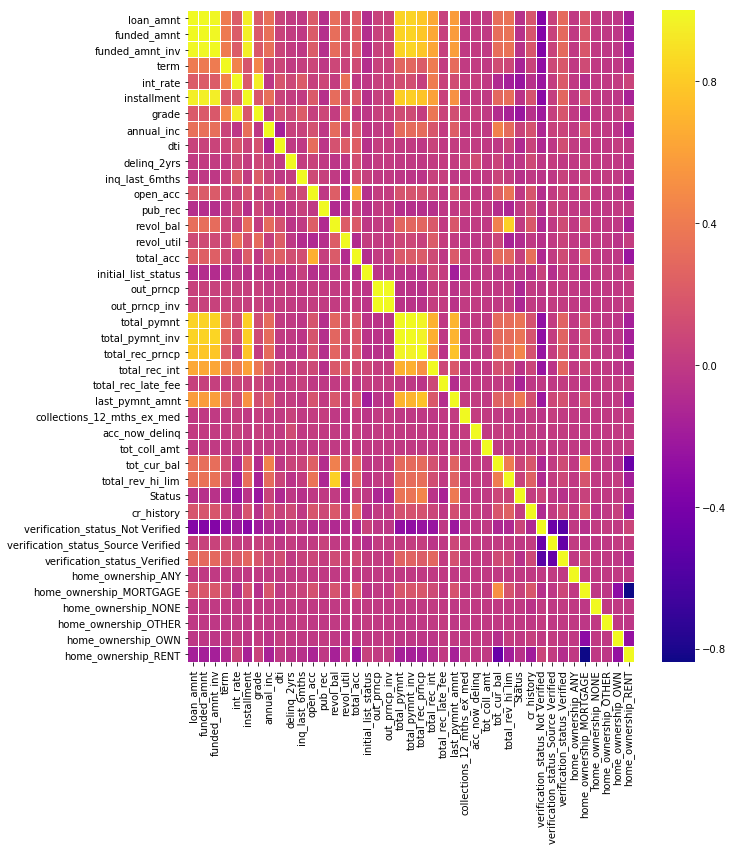

In [20]:
import seaborn as sns
cor = df3.corr()
#sns.heatmap(cor, xticklabels = cor.columns, yticklabels = cor.columns)
fig, ax = plt.subplots(figsize=(10,12))         # Sample figsize in inches
sns.heatmap(cor, linewidths=.1, ax=ax, cmap='plasma')

### Fill NAs

In [21]:
df3.isna().sum()[df3.isna().sum()>0]

annual_inc                        4
delinq_2yrs                      29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_util                      240
total_acc                        29
collections_12_mths_ex_med      145
acc_now_delinq                   29
tot_coll_amt                  66475
tot_cur_bal                   66475
total_rev_hi_lim              66475
dtype: int64

In [22]:
sum(df3.isna().sum(axis=1)>0)

66596

In [23]:
df4 = df3.copy()

In [24]:
df4 = df4[~df4.acc_now_delinq.isna()]

In [25]:
df4.isna().sum()[df4.isna().sum()>0]

revol_util                      211
collections_12_mths_ex_med      116
tot_coll_amt                  66446
tot_cur_bal                   66446
total_rev_hi_lim              66446
dtype: int64

In [26]:
df4["revol_util"] = df4["revol_util"].fillna(df4.annual_inc.mean())
df4["collections_12_mths_ex_med"] = df4["collections_12_mths_ex_med"].fillna(df4.collections_12_mths_ex_med.mean())
df4["tot_coll_amt"] = df4["tot_coll_amt"].fillna(df4.tot_coll_amt.mean())
df4["tot_cur_bal"] = df4["tot_cur_bal"].fillna(df4.tot_cur_bal.mean())
df4["total_rev_hi_lim"] = df4["total_rev_hi_lim"].fillna(df4.total_rev_hi_lim.mean())

In [27]:
df4.isna().sum().sum()

0

In [28]:
#df4.to_csv('df.csv')

---

In [29]:
#df4 = pd.read_csv("df.csv")

In [30]:
df4.shape

(256910, 41)

In [31]:
X = df4._get_numeric_data().drop(columns = "Status")
Y = df4.Status
y = df4.Status

In [32]:
import sklearn as sk #scikit learn
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

# Decision Tree

In [33]:
Y.value_counts()/len(Y)

1    0.816181
0    0.183819
Name: Status, dtype: float64

In [34]:
dt = tree.DecisionTreeClassifier(max_depth = 3)

In [35]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

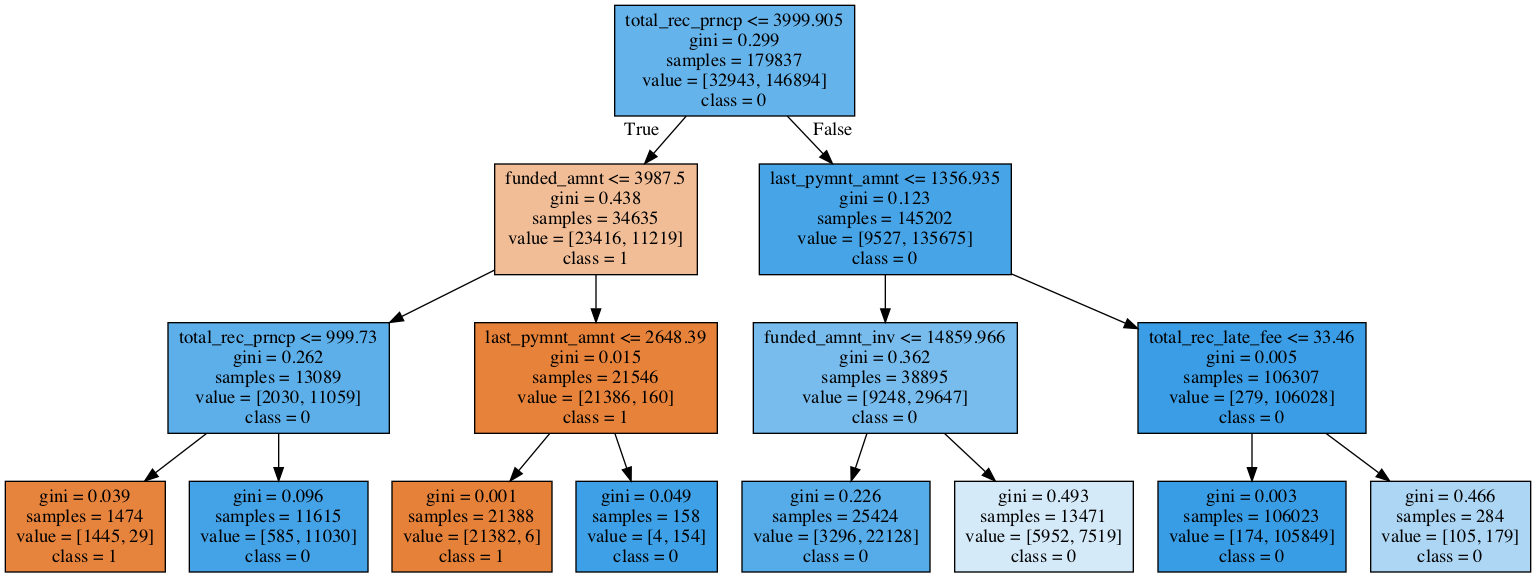

In [36]:
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [37]:
from sklearn.tree import DecisionTreeClassifier as CART
model = CART()
model.fit(X_train, y_train)
ypred = model.predict(X_test)

In [38]:
probs = model.predict_proba(X_test)

In [39]:
probs

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [40]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

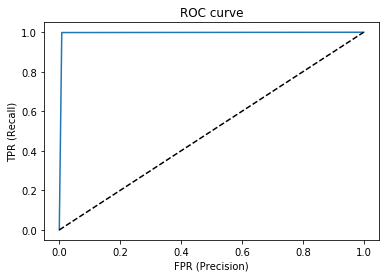

Area under curve (AUC):  0.9951506145878


In [41]:
#y_score = model.predict_proba(X)[:,1] 
y_score = model.predict_proba(X_test)[:,1] 
fpr, tpr, _ = roc_curve(y_test, y_score) 
title('ROC curve') 
xlabel('FPR (Precision)') 
ylabel('TPR (Recall)') 
plot(fpr,tpr) 
plot((0,1), ls='dashed',color='black') 
plt.show() 
print('Area under curve (AUC): ', auc(fpr,tpr))

---

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

/Users/xyang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9975718799239306

In [40]:
# Evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

/Users/xyang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
# Predict class labels for the test set
predicted = model2.predict(X_test)
print(predicted)

[1 1 1 ... 1 1 1]


In [42]:
# Generate class probabilities
probs = model2.predict_proba(X_test)
print(probs)

[[0.00000000e+00 1.00000000e+00]
 [4.78248464e-05 9.99952175e-01]
 [3.16568440e-03 9.96834316e-01]
 ...
 [2.45374780e-07 9.99999755e-01]
 [5.86661560e-03 9.94133384e-01]
 [1.11164139e-02 9.88883586e-01]]


In [43]:
# Confusion Matrix
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[ 13660    591]
 [    13 243343]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     14251
           1       1.00      1.00      1.00    243356

   micro avg       1.00      1.00      1.00    257607
   macro avg       1.00      0.98      0.99    257607
weighted avg       1.00      1.00      1.00    257607



In [44]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.9976553432166051
0.9887708336570248


### Discriminant Analysis

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA()
model.fit(X_train, y_train)

/Users/xyang/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [46]:
#PREDICTION ON TEST DATA
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix

y_hat = model.predict(X_test)

In [47]:
#ACCURACY
#Out of sample
accuracy_score(y_test,y_hat)

0.9823219089543375

In [48]:
#CLASSIFICATION REPORT
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.99      0.69      0.81     14251
           1       0.98      1.00      0.99    243356

   micro avg       0.98      0.98      0.98    257607
   macro avg       0.99      0.84      0.90    257607
weighted avg       0.98      0.98      0.98    257607



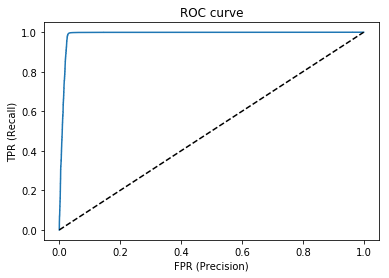

Area under curve (AUC):  0.9889322143638938


In [49]:
#ROC, AUC
y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

In [50]:
#CONFUSION MATRIX
cm = confusion_matrix(y_test, y_hat)
cm

array([[  9780,   4471],
       [    83, 243273]])

### Naive_Bayes

In [51]:
#FIT MODEL
from sklearn.naive_bayes import GaussianNB as NB
model = NB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [52]:
#CONFUSION MATRIX
ypred = model.predict(X_test)
cm = confusion_matrix(y_test, ypred)
cm

array([[ 13213,   1038],
       [ 44104, 199252]])

In [53]:
#ACCURACY
accuracy_score(y_test,ypred)

0.8247640786158761

In [54]:
#CLASSIFICATION REPORT
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.23      0.93      0.37     14251
           1       0.99      0.82      0.90    243356

   micro avg       0.82      0.82      0.82    257607
   macro avg       0.61      0.87      0.63    257607
weighted avg       0.95      0.82      0.87    257607



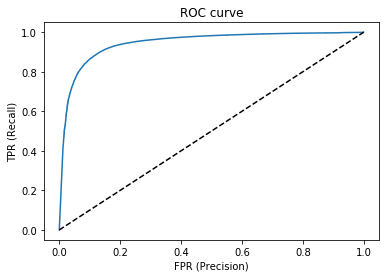

Area under curve (AUC):  0.944978125874129


In [55]:
#ROC, AUC
y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

In [56]:
mean(Y)

0.9450033714185229

### SMOTE

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
sm = SMOTE(random_state=2)
X_res, y_res = sm.fit_sample(X, y.ravel())

In [49]:
mean(y_res)

0.5

In [50]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
X_test_res, y_test_res = sm.fit_sample(X_test, y_test.ravel())

In [51]:
import sklearn as sk #scikit learn
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import train_test_split

In [52]:
dt = tree.DecisionTreeClassifier(max_depth = 3)

In [53]:
dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

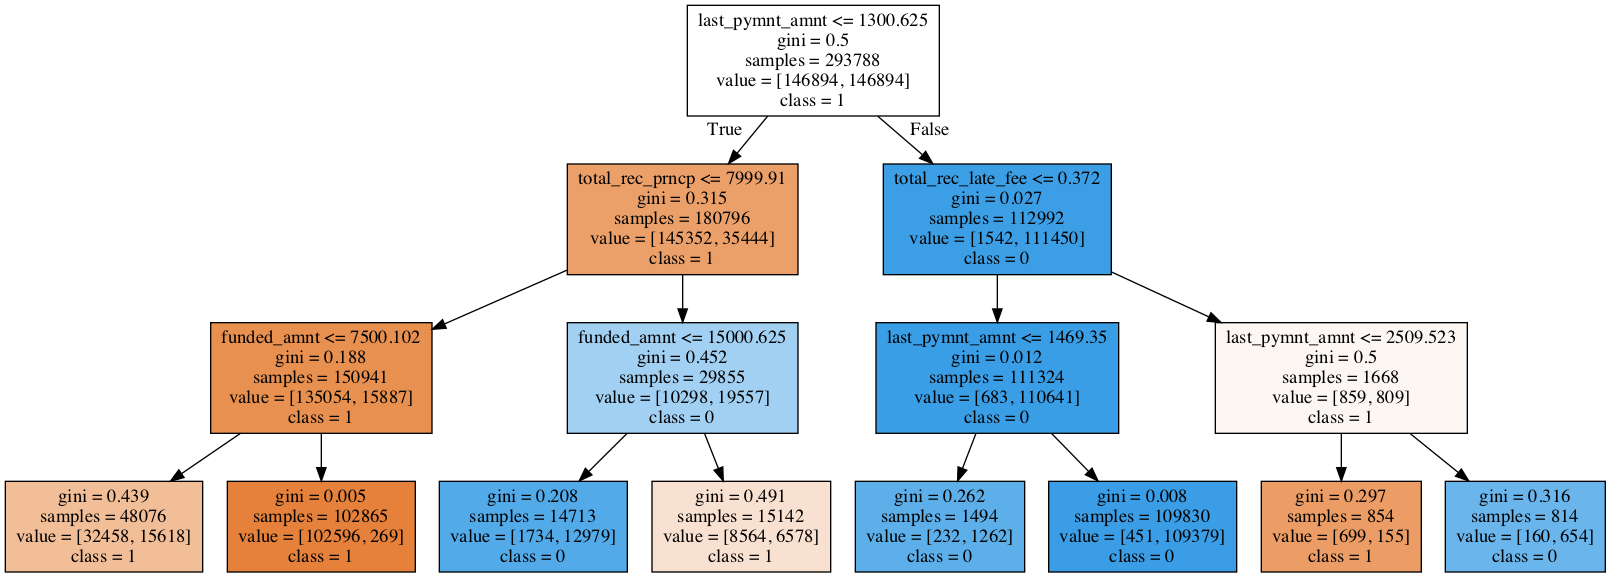

In [54]:
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [55]:
from sklearn.tree import DecisionTreeClassifier as CART
model = CART()
model.fit(X_train_res, y_train_res)
ypred = model.predict(X_test_res)

In [56]:
probs = model.predict_proba(X_test)

In [57]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

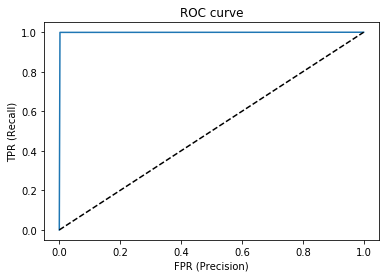

Area under curve (AUC):  0.9985306213119876


In [58]:
#y_score = model.predict_proba(X)[:,1] 
y_score = model.predict_proba(X)[:,1] 
fpr, tpr, _ = roc_curve(y, y_score) 
title('ROC curve') 
xlabel('FPR (Precision)') 
ylabel('TPR (Recall)') 
plot(fpr,tpr) 
plot((0,1), ls='dashed',color='black') 
plt.show() 
print('Area under curve (AUC): ', auc(fpr,tpr))

### KNN

In [59]:
len(df4.columns)

41

In [60]:
#FIT MODEL
from sklearn.neighbors import KNeighborsClassifier as KNNC
model = KNNC(n_neighbors=3, algorithm='ball_tree')
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [61]:
#CONFUSION MATRIX
ypred = model.predict(X_test)
cm = confusion_matrix(y_test, ypred)
cm

array([[11951,  2331],
       [  318, 62473]])

In [62]:
#ACCURACY
accuracy_score(y_test,ypred)

0.9656299871550348

In [63]:
#CLASSIFICATION REPORT
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90     14282
           1       0.96      0.99      0.98     62791

   micro avg       0.97      0.97      0.97     77073
   macro avg       0.97      0.92      0.94     77073
weighted avg       0.97      0.97      0.96     77073



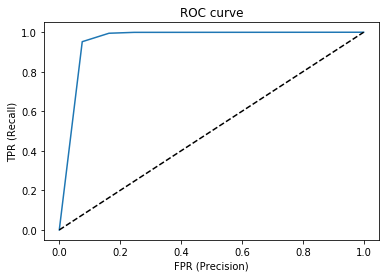

Area under curve (AUC):  0.9577189281679991


In [64]:
#ROC, AUC
y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

### Support Vector Machines

In [ ]:
#FIT MODEL
from sklearn import svm
model = svm.SVC()
model.fit(X_train,y_train)
ypred = model.predict(X_test)

/Users/xyang/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
#CONFUSION MATRIX
cm = confusion_matrix(y, ypred)
cm

In [ ]:
#ACCURACY
accuracy_score(y,ypred)

In [ ]:
# Predict class labels for the test set
predicted = model.predict(X_test)

In [ ]:
# Generate class probabilities
probs = model.predict_proba(X_test)

In [ ]:
# Confusion Matrix
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

In [ ]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

#ROC, AUC
y_score = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

### SMOTE Random Forest

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
sm = SMOTE(random_state=2)
X_res, y_res = sm.fit_sample(X, y.ravel())

In [36]:
mean(y_res)

0.5

In [37]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
X_test_res, y_test_res = sm.fit_sample(X_test, y_test.ravel())

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
dt = RandomForestClassifier(random_state = 0)

In [40]:
dt.fit(X_train_res, y_train_res)

/Users/xyang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [42]:
ypred = dt.predict(X_test_res)

In [43]:
probs = dt.predict_proba(X_test)

In [44]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

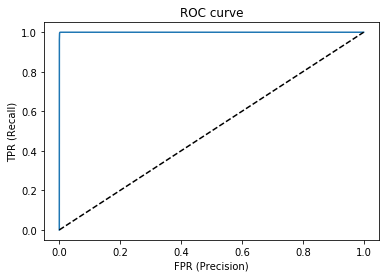

Area under curve (AUC):  0.9998394675377911


In [46]:
#y_score = model.predict_proba(X)[:,1] 
y_score = dt.predict_proba(X)[:,1] 
fpr, tpr, _ = roc_curve(y, y_score) 
title('ROC curve') 
xlabel('FPR (Precision)') 
ylabel('TPR (Recall)') 
plot(fpr,tpr) 
plot((0,1), ls='dashed',color='black') 
plt.show() 
print('Area under curve (AUC): ', auc(fpr,tpr))